In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df1 = pd.read_csv('admission.csv')
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df=df1.copy()

In [5]:
df.shape

(500, 9)

In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [12]:
num_col = df.dtypes[df.dtypes != 'object']
num_col

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
df.drop(['Serial No.'],axis =1 ,inplace = True)

In [15]:
df.columns
print(len(df.columns))

8


## EDA


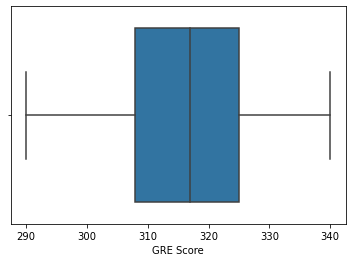

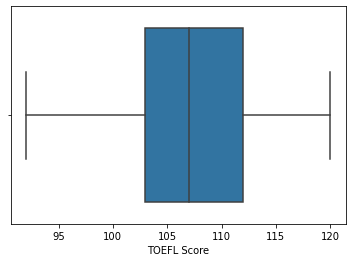

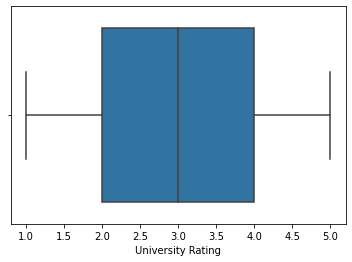

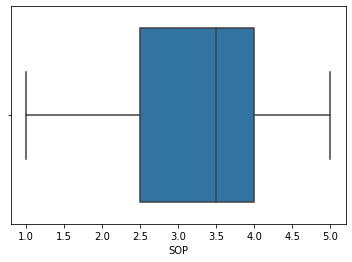

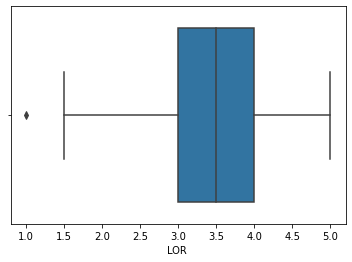

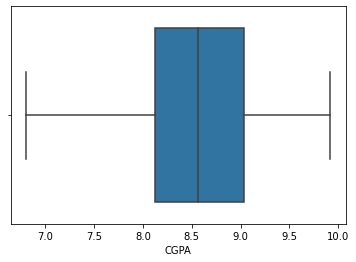

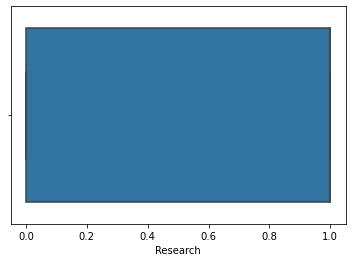

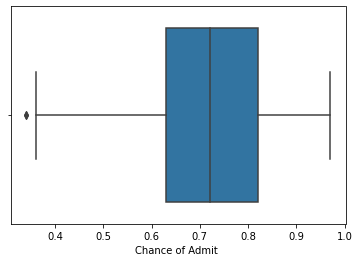

In [19]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

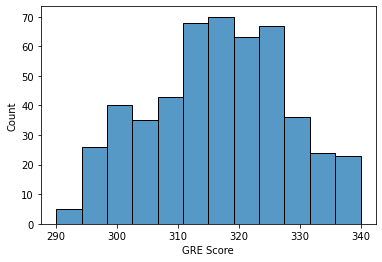

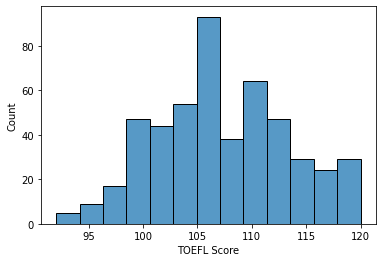

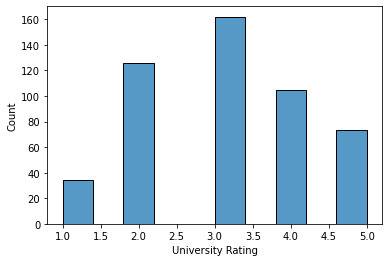

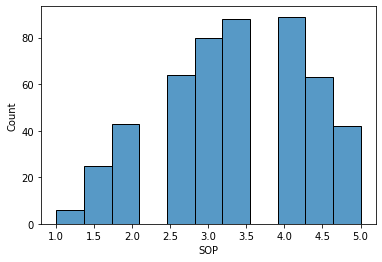

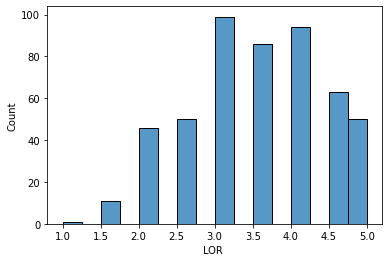

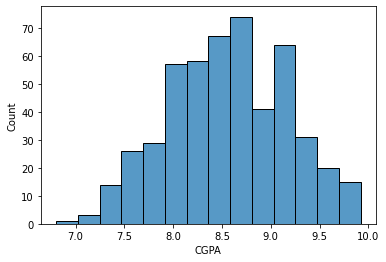

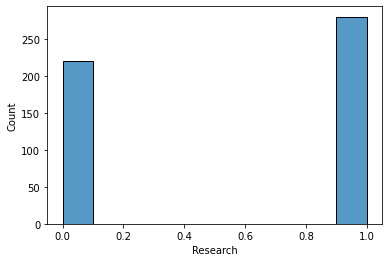

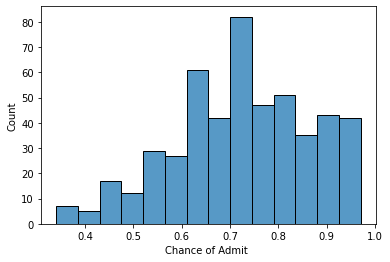

In [21]:
for i in df.columns:
    sns.histplot(x = df[i])
    plt.show()

In [23]:
# correlaion
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

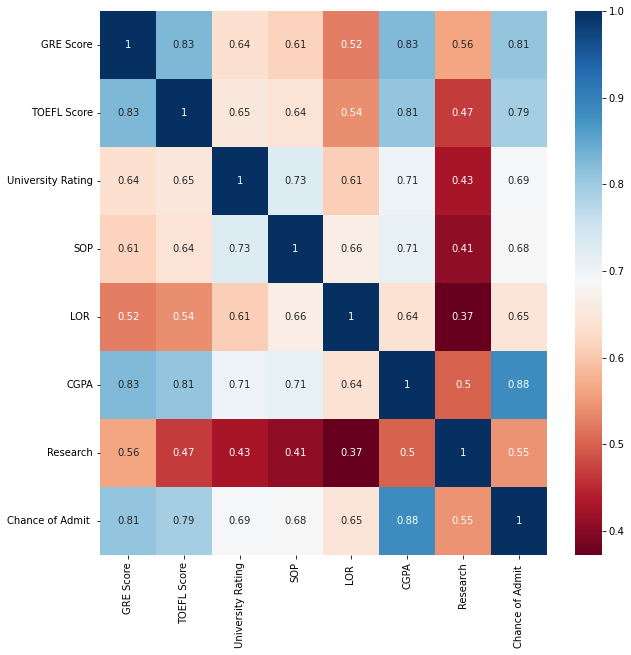

In [24]:
plt.figure(figsize = (10,10))
sns.heatmap(corr ,annot = True, cmap ='RdBu')

<AxesSubplot:>

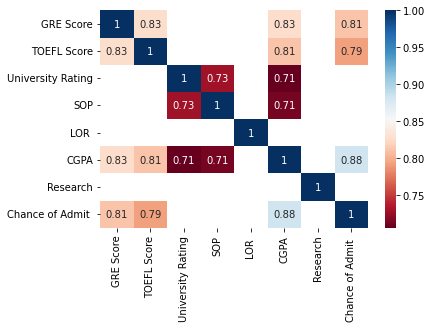

In [31]:
# plt.figure(figsize = (10,8))
sns.heatmap(corr[abs(corr) > 0.7] ,annot = True, cmap ='RdBu')

In [29]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# GRE Score and TOEFL Score - 0.83
# GRE Score and CGPA - 0.83
# GRE Score and TOEFL Score - 0.83
# TOEFL Score and CGPA-0.81
# Chance of Admit and GRE Score -0.88
# University Rating and CGPA 0.71

Find out the minimum and maximum values for GRE
score

In [38]:
df[df['GRE Score']==df['GRE Score'].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,340,120,5,4.5,4.5,9.60,1,0.94
33,340,114,5,4.0,4.0,9.60,1,0.90
81,340,120,4,5.0,5.0,9.50,1,0.96
84,340,115,5,4.5,4.5,9.45,1,0.94
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
284,340,112,4,5.0,4.5,9.66,1,0.94
384,340,113,4,5.0,5.0,9.74,1,0.96
429,340,115,5,5.0,4.5,9.06,1,0.95


In [39]:
df[df['GRE Score']==df['GRE Score'].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,290,104,4,2.0,2.5,7.46,0,0.45
377,290,100,1,1.5,2.0,7.56,0,0.47


Find out the percentage of universities for each
university rating

In [44]:
print(df['University Rating'].unique())
print(df['University Rating'].nunique())
print(df['University Rating'].value_counts())

[4 3 2 5 1]
5
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64


Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned
value 0
Where 0: Low chance of Admission and 1: High chance of
admission

In [50]:
df['Chance of Admit ']

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int32

In [49]:
df['Chance of Admit '] = np.where(df['Chance of Admit '] < 0.80,0,1)

In [52]:
df['Chance of Admit '].value_counts()

0    345
1    155
Name: Chance of Admit , dtype: int64

Build a Decision Tree classifier, to predict whether a
student has a low or high chance of admission to a chosen
university. Perform Hyperparameter Tuning to improve
the accuracy of the model.

In [56]:
# selecting x and y

In [58]:
x= df.drop('Chance of Admit ',axis =1)
y =df['Chance of Admit ']
print(x.shape)
print(x.shape)
print(type(x))
print(type(y))

(500, 7)
(500, 7)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 7)
(125, 7)
(375,)
(125,)


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
dt_res=model_metrics(dt,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.912
Predictions
 [1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0]
Confusion Matrix
 [[85  5]
 [ 6 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        90
           1       0.85      0.83      0.84        35

    accuracy                           0.91       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.91      0.91      0.91       125



In [71]:
model = pd.DataFrame(dt_res,index=['Log_Reg'])
model

,Train_Score,Test_Score
Log_Reg,1.0,0.912


In [93]:
fn = x_train.columns
cn = ['0','1']

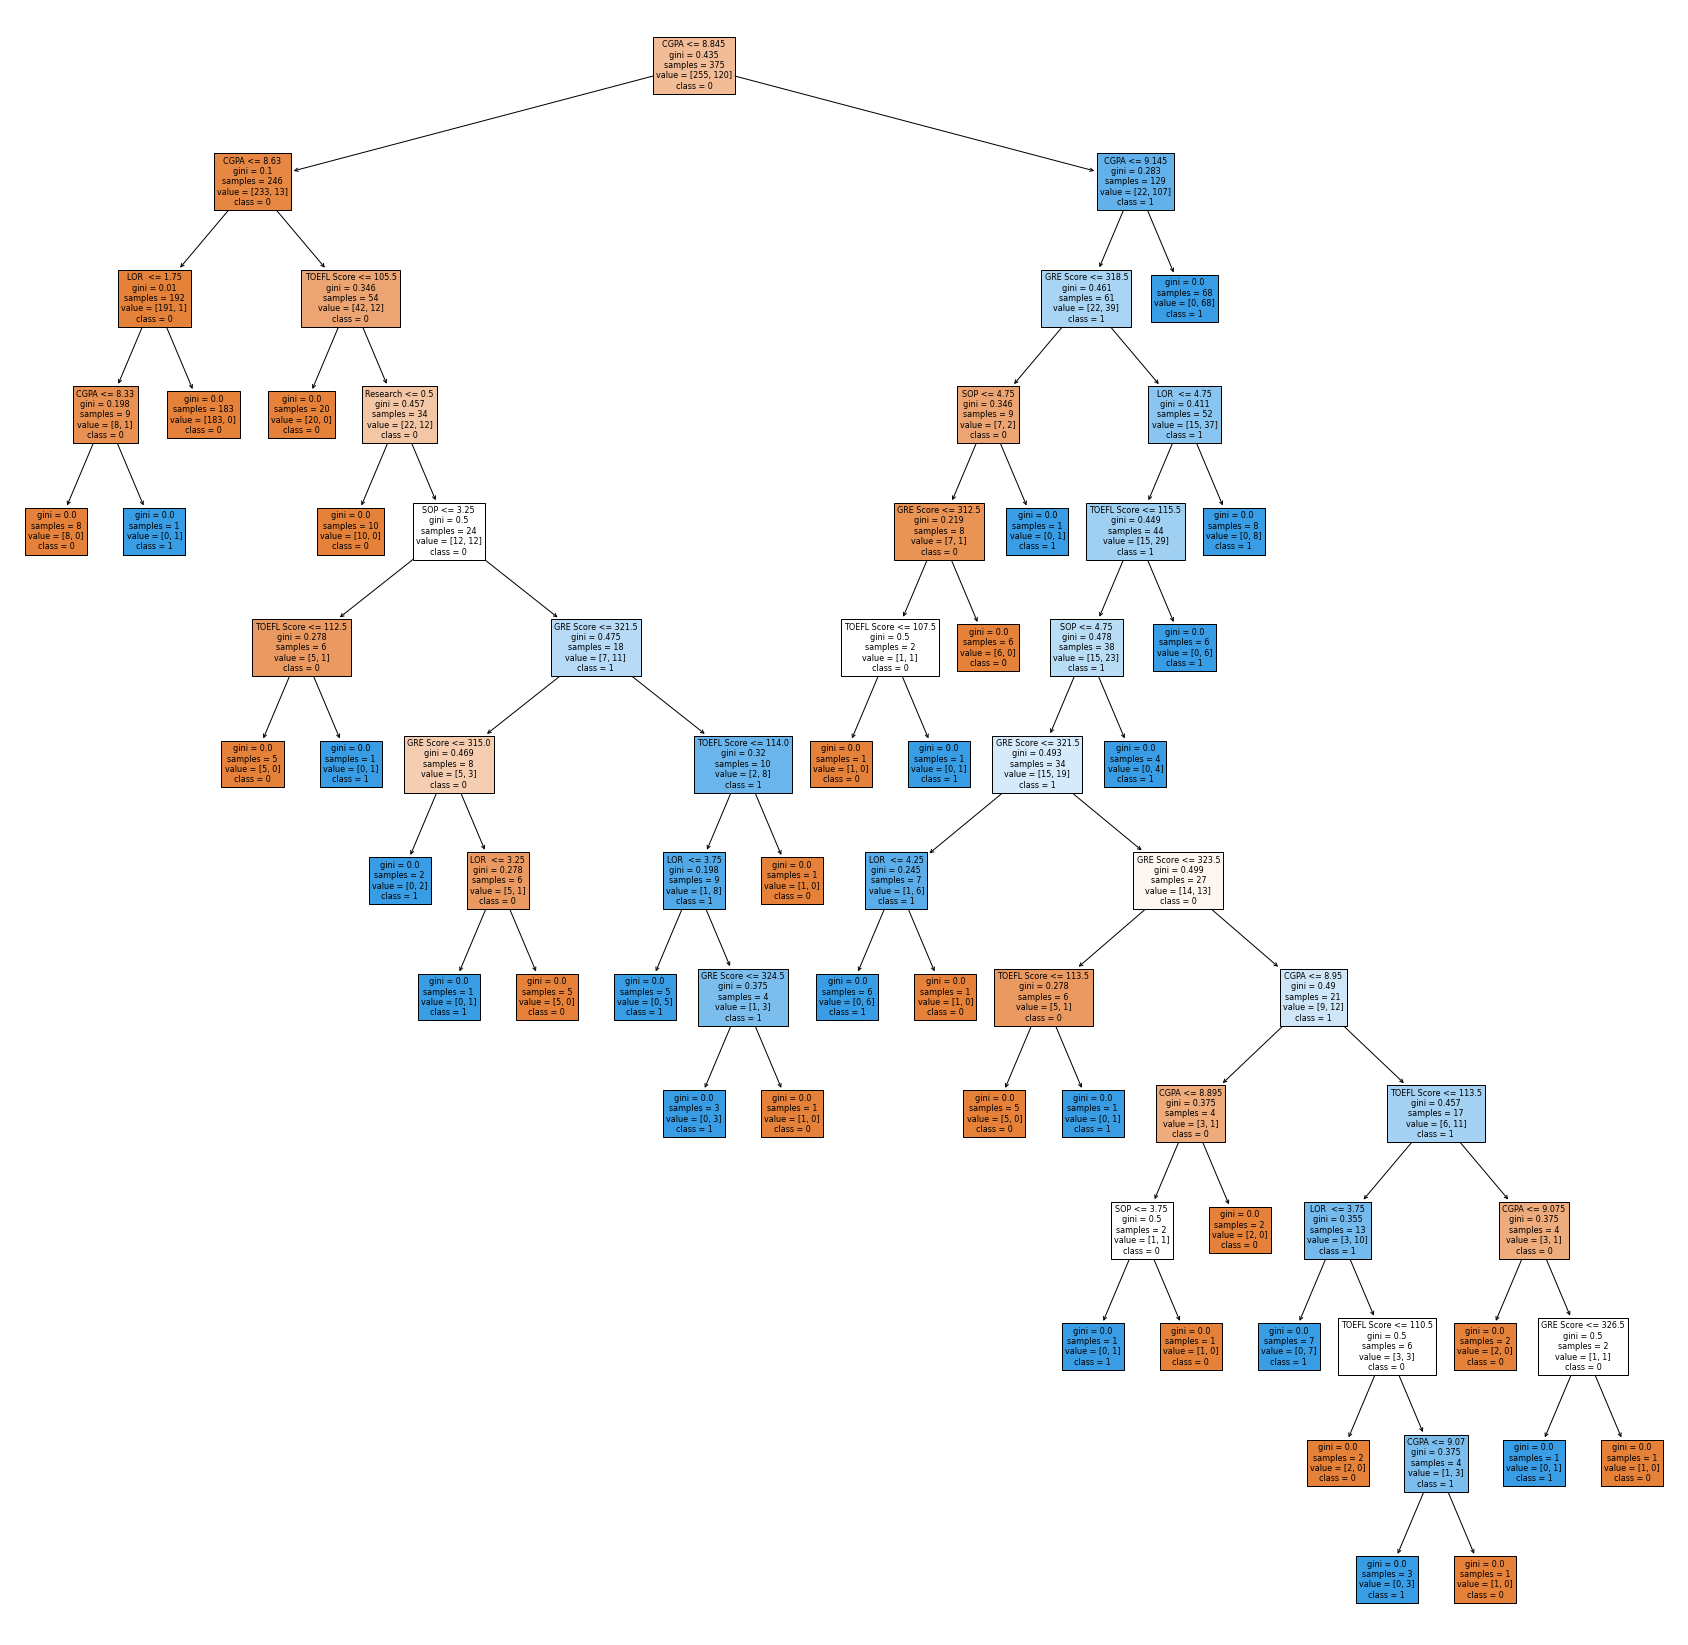

In [97]:
plt.figure(figsize=(30,30))
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

### HyperParameter Tuning Using GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV,KFold


In [85]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':[14,18,19,20,21,22,23,24],
             'min_samples_split':[17,20,22,24,25,26,27,30]}

In [89]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel,param_grid=hparams_dt,cv=kf, scoring='accuracy') 
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 18, 19, 20, 21, 22, 23, 24],
                         'min_samples_split': [17, 20, 22, 24, 25, 26, 27, 30]},
             scoring='accuracy')

In [90]:
print('Best Hyperparamters')
print(gs1.best_params_)
print(gs1.best_estimator_)


Best Hyperparamters
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 25}
DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=25)


In [91]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.9306666666666666
Testing score 0.96
Predictions
 [1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
Confusion Matrix
 [[87  3]
 [ 2 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.92      0.94      0.93        35

    accuracy                           0.96       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.96      0.96      0.96       125



In [100]:
model = pd.DataFrame(gs_based_res,index=['Using GridSearchCV'])
model

,Train_Score,Test_Score
Using GridSearchCV,0.930667,0.96


Build a Random Forest classifier, to predict whether a
student has a low or high chance of admission to a chosen
university.

In [101]:
rfc = RandomForestClassifier()

In [103]:
rfc_res=model_metrics(rfc,x_train,x_test,y_train,y_test)

Training score 1.0
Testing score 0.944
Predictions
 [1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
Confusion Matrix
 [[87  3]
 [ 4 31]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.91      0.89      0.90        35

    accuracy                           0.94       125
   macro avg       0.93      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



In [104]:
model = pd.DataFrame(rfc_res,index=['Using GridSearchCV'])
model

,Train_Score,Test_Score
Using GridSearchCV,1.0,0.944


In [65]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    eval_model(y_test,ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    return res

In [67]:
def eval_model(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))